In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

# defining global variable path
image_path = "dataset_train/dataset/"
from IPython.display import display, HTML

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def loadImages(path):
    # literalmente dar load das imagens todas para estes arrays
    # Listas por compreencao for life <3
    real = [image.load_img(image_path+"/real/"+file,target_size = (28,28), color_mode='grayscale') for file in os.listdir(image_path+"/real")]
    fake = [image.load_img(image_path+"/fake/"+file,target_size = (28,28), color_mode='grayscale') for file in os.listdir(image_path+"/fake")]
    return real,fake
  
real, fake = loadImages(image_path)
len(real),len(fake)

(20000, 20000)

In [3]:
# Aqui passo as imagens para os arrays numpy
def imagesToArray(imgs):
    return np.array([image.img_to_array(img)[:,:,0] for img in imgs])
real_array = imagesToArray(real)
fake_array = imagesToArray(fake)

In [4]:
def show_img(img):
    # plot da imagem tenho de usar o array_to_img para dar plot
    to_show = image.array_to_img(img)
    plt.imshow(to_show, cmap='Greys_r')
    plt.title("Real")
    plt.axis('off')
    plt.show()

In [5]:
def show_img_augmentation(img):
    
    # Aqui e so para visualizar as transformacoes de uma imagem
    # Stuff para o relatorio
    fig, axs = plt.subplots(2,4)
    fig.suptitle('Images Augmentation')
    new_ = img
    for i in range(4):
        axs[0,i].imshow(new_, cmap='Greys_r')
        axs[1,i].imshow(np.flip(new_,1), cmap='Greys_r')
        new_ = np.rot90(new_)
        
    
   
    plt.show()


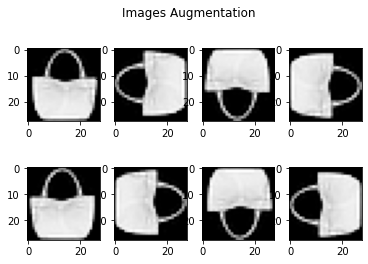

In [6]:
display(HTML('<h3>Data Augmentation</h3>'))
display(HTML('''<p>De maneira a aumentar os dados disponiveis
             decimos aplicar rotações e simetrias simples
             sob os dados, como ilustramos nas imagens 
             aqui em baixo:</p>'''))
display(HTML('''<p>Deste modo, deixamos de ter
             <b>40.000</b> dados de treino e passamos a ter
             <b>360.000</b> (aumento de 900%).</p>'''))

show_img_augmentation(real_array[3])

In [7]:
def data_augmentatrion(imgs):
    # aqui aplico as tranformacoes em cima e mando tudo para um array
    def rotations_simetries(img):
        new_imgs = [img]
        new_ = img
        for i in range(4):
            new_ = np.rot90(new_)
            new_imgs.append(new_)
            new_imgs.append(np.flip(new_,1))

        return new_imgs
    all_images = []
    for elem in imgs:
        all_images.extend(rotations_simetries(elem))
    return all_images

In [8]:
real_aug = data_augmentatrion(real_array)
fake_aug = data_augmentatrion(fake_array)

In [12]:
def save_new_data(real_aug,fake_aug):
    # aqui guardo as imagens novas e antigas para pastas
    # tens de criar as pastas a pata (dataset_augmentated/real e dataset_augmentated/fake)

    image_path = "dataset_train/dataset_augmentated"
    for i,img in enumerate(real_aug):
        image.save_img(image_path+"/real/img_{}.png".format(i),img[:,:, np.newaxis])
    for i,img in enumerate(fake_aug):
        image.save_img(image_path+"/fake/img_{}.png".format(i),img[:,:, np.newaxis])
save_new_data(real_aug,fake_aug)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_train/dataset_augmentated/real/img_0.png'

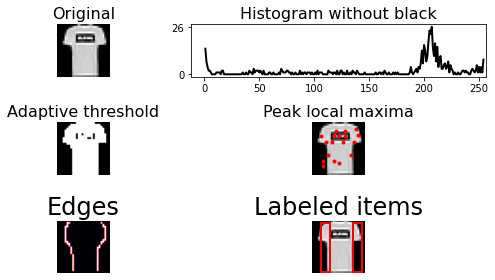

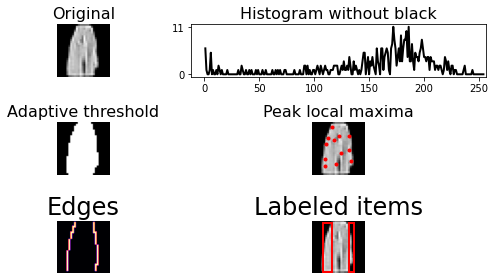

In [13]:
from skimage.filters import apply_hysteresis_threshold
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.feature import canny
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label


def deep_analysis_in_image(image,title):
    display(HTML('<h2>{}</h2>'.format(title)))
    #image = image[:,:,0]
    fig, axes = plt.subplots(ncols=2, nrows=3,
                         figsize=(8, 4))
    ax0, ax1, ax2, ax3, ax4, ax5  = axes.flat
    ax0.imshow(image, cmap=plt.cm.gray)
    ax0.set_title('Original', fontsize=16)
    ax0.axis('off')
    
    values, bins = np.histogram(image,
                            bins=np.arange(256))

    ax1.plot(bins[1:-1], values[1:], lw=2, c='k')
    ax1.set_xlim(xmax=256)
    ax1.set_yticks([0, max(values[1:])])
    #ax1.set_aspect(.2)
    ax1.set_title('Histogram without black', fontsize=16)
    
    
    
    
    bw = apply_hysteresis_threshold(image, 95, 15)

    ax2.imshow(bw, cmap=plt.cm.gray)
    ax2.set_title('Adaptive threshold', fontsize=16)
    ax2.axis('off')
    
    coordinates = peak_local_max(image, min_distance=2)
    ax3.imshow(image, cmap=plt.cm.gray)
    ax3.autoscale(False)
    ax3.plot(coordinates[:, 1],
             coordinates[:, 0], 'r.')
    ax3.set_title('Peak local maxima', fontsize=16)
    ax3.axis('off')
    
   
    edges = canny(image, sigma=3,
                     low_threshold=10,
                     high_threshold=80)

    ax4.imshow(edges, cmap=plt.cm.magma)
    ax4.set_title('Edges', fontsize=24)
    ax4.axis('off')
    

    
    label_image = label(edges)

    ax5.imshow(image, cmap=plt.cm.gray)
    ax5.set_title('Labeled items', fontsize=24)
    ax5.axis('off')

    for region in regionprops(label_image):
        # Draw rectangle around segmented coins.
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr),
                                  maxc - minc,
                                  maxr - minr,
                                  fill=False,
                                  edgecolor='red',
                                  linewidth=2)
        ax5.add_patch(rect)
    
    plt.tight_layout()
    plt.show()



deep_analysis_in_image(real_aug[16],"Real")
deep_analysis_in_image(fake_aug[16],"Fake")

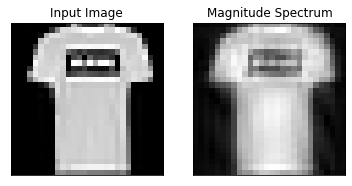

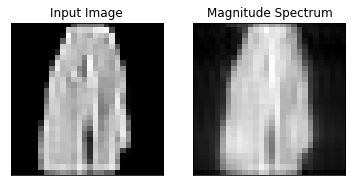

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def magnitude_spectrum(img):
    rows, cols = img.shape
    crow,ccol = rows//2 , cols//2

    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # create a mask first, center square is 1, remaining all zeros
    mask = np.zeros((rows,cols,2),np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1

    # apply mask and inverse DFT
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
magnitude_spectrum(real_aug[16])
magnitude_spectrum(fake_aug[16])


In [17]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = real_aug[16][:,:,np.newaxis]
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

error: OpenCV(4.5.1) c:\users\appveyor\appdata\local\temp\1\pip-req-build-wvn_it83\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xeee51b91::Set<1,-1,-1>,struct cv::impl::A0xeee51b91::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


NameError: name 'filters' is not defined

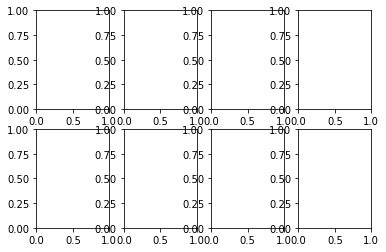

In [18]:
def thresholds_and_edges(real_array,fake_array,ind):
    display(HTML('<h2>Real vs Fake</h2>'))
    
    fig, ax = plt.subplots(nrows=2, ncols=4)

    image = real_array[ind]#[:,:,0]
    edges = filters.sobel(image)
    low = 255*0.1
    high = 255*0.35

    lowt = (edges > low).astype(int)
    hight = (edges > high).astype(int)
    hyst = filters.apply_hysteresis_threshold(edges, low, high)

    ax[0, 0].imshow(image, cmap='gray')
    ax[0, 0].set_title('Real Original \nImage')

    ax[0, 1].imshow(edges, cmap='magma')
    ax[0, 1].set_title('Real Sobel\nedges')

    ax[0, 2].imshow(lowt, cmap='magma')
    ax[0, 2].set_title('Real Low\nthreshold')

    ax[0, 3].imshow(hight + hyst, cmap='magma')
    ax[0, 3].set_title('Real Hysteresis\nthreshold')
    
    image = fake_array[ind][:,:,0]
    edges = filters.sobel(image)
    low = 255*0.1
    high = 255*0.35

    lowt = (edges > low).astype(int)
    hight = (edges > high).astype(int)
    hyst = filters.apply_hysteresis_threshold(edges, low, high)
    



    ax[1, 0].imshow(image, cmap='gray')
    ax[1, 0].set_title('Fake Original\nImage')

    ax[1, 1].imshow(edges, cmap='magma')
    ax[1, 1].set_title('Fake Sobel\nedges')

    ax[1, 2].imshow(lowt, cmap='magma')
    ax[1, 2].set_title('Fake Low\nthreshold')

    ax[1, 3].imshow(hight + hyst, cmap='magma')
    ax[1, 3].set_title('Fake Hysteresis\n threshold')

    for a in ax.ravel():
        a.axis('off')

    plt.tight_layout(h_pad=4)

    plt.show()
thresholds_and_edges(real_aug,fake_aug,16)
